In [1]:
# pip install lightbgm

<center><h1><b><u>Sign - Detection</u></b></h1></center>

In [2]:
# Importing necessary dependencies

import numpy as np
import pandas as pd
import cv2
import os
import h5py
import matplotlib.pyplot as plt
from skimage import feature
import seaborn as sns
import math
from datetime import datetime
import sklearn
import joblib


from sklearn.model_selection import KFold, RepeatedStratifiedKFold, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, make_scorer

C:\ProgramData\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


<center><h1><b><u>Loading and Preprocessing the data.</u></b></h1></center>

In [3]:
# loading dataset
data = pd.read_csv('combined_shuffled_data.csv')

In [4]:
data.head()

,Class,x0,y0,x1,y1,x2,y2,x3,y3,x4,...,x16,y16,x17,y17,x18,y18,x19,y19,x20,y20
0,Great,0.000000,0.358014,0.028633,0.261807,0.080479,0.150481,0.092550,0.069403,0.073313,...,0.114179,0.336331,0.067307,0.412967,0.156017,0.406986,0.135666,0.398904,0.102342,0.395739
1,w,0.114410,0.452124,0.151697,0.403126,0.151672,0.322970,0.093860,0.282089,0.040309,...,0.000000,0.052778,0.046492,0.277169,0.043222,0.244667,0.062870,0.277879,0.076489,0.310675
2,Yes,0.232559,0.112246,0.128020,0.138899,0.045302,0.133864,0.000000,0.137898,0.018563,...,0.160937,0.121955,0.207653,0.037820,0.196609,0.151811,0.203085,0.140578,0.205873,0.095049
3,p,0.122569,0.008414,0.100475,0.065455,0.075029,0.108107,0.062539,0.145782,0.060839,...,0.049366,0.092668,0.031593,0.000000,0.009215,0.039787,0.023050,0.069980,0.043785,0.080499
4,m,0.000513,0.000000,0.062006,0.007733,0.107149,0.063988,0.109499,0.138805,0.091431,...,0.048110,0.292716,0.000000,0.080267,0.014154,0.167593,0.021055,0.217561,0.025602,0.259582


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77996 entries, 0 to 77995
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   77996 non-null  object 
 1   x0      77996 non-null  float64
 2   y0      77996 non-null  float64
 3   x1      77996 non-null  float64
 4   y1      77996 non-null  float64
 5   x2      77996 non-null  float64
 6   y2      77996 non-null  float64
 7   x3      77996 non-null  float64
 8   y3      77996 non-null  float64
 9   x4      77996 non-null  float64
 10  y4      77996 non-null  float64
 11  x5      77996 non-null  float64
 12  y5      77996 non-null  float64
 13  x6      77996 non-null  float64
 14  y6      77996 non-null  float64
 15  x7      77996 non-null  float64
 16  y7      77996 non-null  float64
 17  x8      77996 non-null  float64
 18  y8      77996 non-null  float64
 19  x9      77996 non-null  float64
 20  y9      77996 non-null  float64
 21  x10     77996 non-null  float64
 22

In [6]:
data.describe(include = 'all')

,Class,x0,y0,x1,y1,x2,y2,x3,y3,x4,...,x16,y16,x17,y17,x18,y18,x19,y19,x20,y20
count,77996,77996.000000,77996.000000,77996.000000,77996.000000,77996.000000,77996.000000,77996.000000,77996.000000,77996.000000,...,77996.000000,77996.000000,77996.000000,77996.000000,77996.000000,77996.000000,77996.000000,77996.000000,77996.000000,77996.000000
unique,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.110504,0.377619,0.122381,0.338972,0.129780,0.277365,0.127690,0.231496,0.121632,...,0.109122,0.211407,0.091995,0.220151,0.092014,0.202622,0.095274,0.215112,0.096765,0.215827
std,NaN,0.095118,0.189739,0.076091,0.169474,0.086244,0.138575,0.094847,0.126275,0.107222,...,0.067451,0.146821,0.100967,0.135066,0.093252,0.131293,0.086646,0.148408,0.086233,0.163949
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.033131,0.263695,0.070242,0.220656,0.060927,0.167405,0.055898,0.130672,0.041936,...,0.058867,0.092523,0.002241,0.113505,0.012188,0.092021,0.023455,0.097001,0.027947,0.099249
50%,NaN,0.091136,0.381840,0.111996,0.329474,0.123015,0.256141,0.115935,0.219159,0.099783,...,0.099556,0.189593,0.053782,0.204254,0.053058,0.184996,0.065832,0.179754,0.074960,0.170955
75%,NaN,0.167133,0.509206,0.163596,0.450342,0.178364,0.368192,0.178119,0.311323,0.173822,...,0.145799,0.302934,0.166483,0.321730,0.160295,0.290992,0.155102,0.312752,0.148993,0.326916


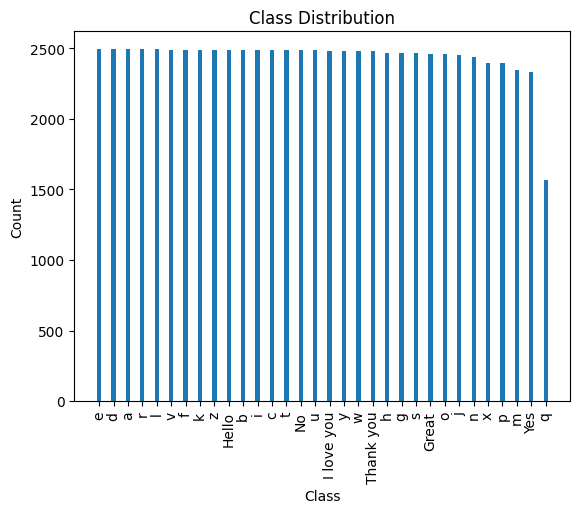

In [7]:
import matplotlib.pyplot as plt
import pandas as pd  # Assuming you have data as a pandas DataFrame

df = pd.DataFrame(data)

# Calculate value counts
class_counts = df['Class'].value_counts()

plt.bar(class_counts.index, class_counts.values, width=0.3)

# Rotate x-axis labels for better readability (adjust angle as needed)
plt.xticks(rotation= 90)  # Rotate labels by 45 degrees

plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()

<center><h1><b><u>Training the models.</u></b></h1></center>

In [8]:
X = data.drop(columns=["Class"])  # Features
y = data["Class"]  # Target labels

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.metrics import accuracy_score, classification_report
def acc(y_test,y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    classification_report_str = classification_report(y_test, y_pred)

    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report_str)

<center><h1><b><u>Support Vector Machines(SVM)</u></b></h1></center>

In [14]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear')  # Linear kernel (you can try other kernels)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [15]:
y_pred = svm_classifier.predict(X_test)

In [16]:
acc(y_test,y_pred)

Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

       Great       1.00      0.98      0.99       502
       Hello       0.99      1.00      0.99       493
  I love you       1.00      1.00      1.00       479
          No       0.97      0.99      0.98       503
   Thank you       0.98      1.00      0.99       492
         Yes       0.99      0.99      0.99       475
           a       0.99      1.00      0.99       510
           b       0.99      0.99      0.99       490
           c       1.00      1.00      1.00       512
           d       0.99      0.97      0.98       489
           e       0.99      0.96      0.98       514
           f       1.00      0.99      0.99       497
           g       0.97      0.98      0.98       498
           h       0.92      0.91      0.92       471
           i       0.96      1.00      0.98       486
           j       1.00      0.99      0.99       535
           k       1.00      0.99      1.00

In [17]:
import joblib
import os
joblib.dump(svm_classifier,os.path.join('Models','svm.h5'))

['Models\\svm.h5']

<center><h1><b><u>Decision Trees</u></b></h1></center>

In [18]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()  # Initialize the decision tree classifier
clf.fit(X_train, y_train)  # Fit the classifier on the training data

DecisionTreeClassifier()

In [19]:
y_pred = clf.predict(X_test)

In [20]:
acc(y_pred,y_test)

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

       Great       1.00      1.00      1.00       503
       Hello       1.00      0.99      0.99       495
  I love you       1.00      1.00      1.00       481
          No       0.98      0.95      0.96       517
   Thank you       1.00      0.99      0.99       496
         Yes       0.98      0.99      0.98       470
           a       0.99      1.00      1.00       505
           b       0.98      0.99      0.99       484
           c       0.99      0.99      0.99       512
           d       0.98      0.98      0.98       493
           e       0.98      0.99      0.98       510
           f       0.99      0.99      0.99       496
           g       0.99      0.98      0.99       504
           h       0.98      0.98      0.98       474
           i       0.99      0.99      0.99       486
           j       0.98      0.99      0.98       529
           k       0.99      0.99      0.99

In [21]:
joblib.dump(clf,os.path.join('Models','tree.h5'))

['Models\\tree.h5']

<center><h1><b><u>Random Forests</u></b></h1></center>

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
y_pred = rf.predict(X_test)

In [24]:
acc(y_pred,y_test)

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

       Great       1.00      1.00      1.00       504
       Hello       1.00      1.00      1.00       494
  I love you       1.00      1.00      1.00       480
          No       1.00      0.99      0.99       509
   Thank you       1.00      1.00      1.00       493
         Yes       0.99      1.00      1.00       473
           a       0.99      1.00      1.00       507
           b       1.00      1.00      1.00       490
           c       1.00      1.00      1.00       512
           d       1.00      1.00      1.00       487
           e       0.99      1.00      0.99       508
           f       0.99      1.00      1.00       495
           g       1.00      1.00      1.00       498
           h       1.00      1.00      1.00       469
           i       1.00      1.00      1.00       485
           j       1.00      0.99      1.00       539
           k       0.99      1.00      1.00

In [25]:
joblib.dump(rf,os.path.join('Models','rf.h5'))

['Models\\rf.h5']

<center><h1><b><u>K-Nearest Neighbour(KNN)</u></b></h1></center>

In [27]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [28]:
y_pred = knn.predict(X_test)

In [29]:
acc(y_pred,y_test)

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

       Great       1.00      1.00      1.00       503
       Hello       1.00      1.00      1.00       494
  I love you       1.00      1.00      1.00       479
          No       1.00      1.00      1.00       503
   Thank you       1.00      0.99      1.00       495
         Yes       1.00      1.00      1.00       474
           a       1.00      1.00      1.00       510
           b       1.00      0.99      1.00       492
           c       1.00      1.00      1.00       512
           d       0.99      1.00      1.00       485
           e       0.99      1.00      1.00       512
           f       0.99      1.00      1.00       493
           g       1.00      1.00      1.00       499
           h       0.99      1.00      1.00       467
           i       1.00      1.00      1.00       486
           j       1.00      1.00      1.00       535
           k       0.99      1.00      1.00

In [30]:
joblib.dump(knn,os.path.join('Models','knn.h5'))

['Models\\knn.h5']

<h2><center>Clearly we can see that KNN and Random Forests provide us with the best test results.</center></h2>